In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Problem 1 : $\epsilon$-greedy & Softmax
Consider a 3-armed bandit
The reward functions are as follows:
1. arm1 : N(1, 0.5)
2. arm2 : N(0, 1)
3. arm3 : N(-2, 10)

Run the box below to see the reward functions

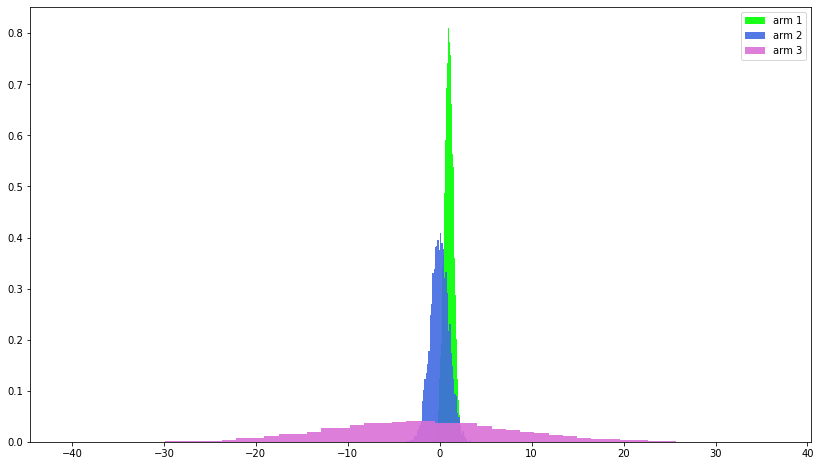

In [3]:
# Reward Distributions
arms_count = 3
mus = [1.0, 0.0, -2.0]
sigmas = [0.5, 1.0, 10.0]
colors = ['lime', 'royalblue', 'orchid']
sample_size = 10000
bins = 50

plt.figure(figsize=(14,8))
for mu, sigma, idx, color in zip(mus, sigmas, np.arange(arms_count), colors):
    sample = np.random.normal(mu, sigma, sample_size)
    plt.hist(sample, bins=bins, density=True, alpha=0.9, label=f'arm {idx+1}', color=color)
plt.legend()
plt.show()

### Define reward funtion which get arm number as input and return reward

In [4]:
def reward(arm):
    r= np.random.normal(mus[arm], sigmas[arm])
    return r

in fact we are trying to find the distribution in which as we take sample form it, the sum of all samples give us the maximum number 

In [5]:
reward(0)

1.2054572024604897

## Greedy approach

In [6]:
rewards = np.zeros(3)
fallen = np.zeros(3)
for i in range(50000):
    arm = np.random.randint(3)  
    fallen[arm] +=1
    rewards[arm] += reward(arm)

Text(0.5, 1.0, 'The Greedy approach')

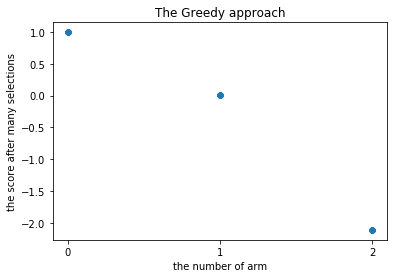

In [7]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

ax.plot(rewards/fallen,'8')
ax.set_xticks([0,1,2])
ax.set_xlabel('the number of arm')
ax.set_ylabel('the score after many selections')
ax.set_title("The Greedy approach")

by using the greedy approach it is clear that the better machine is the third arm

### initiate action values

In [8]:
Qs = np.ones(3) *15

In [9]:
Qs[1]

15.0

### Define decision function for action selection using $\epsilon$-greedy  policy

In [10]:
def select_arm_e_greedy(Qs, epsilon):
    
    rand = np.random.random()
    if rand < 1-epsilon:
        return np.argmax(Qs)
    
    arm = np.random.randint(3)
    return arm

In [11]:
select_arm_e_greedy(Qs,0.9)

1

### Define decision function for action selection using soft-max policy

In [12]:
def select_arm_softmax(Qs, temperature):
    beta = 1/temperature
    partition = np.sum(np.exp(Qs*beta))
    P = np.exp(Qs*beta)/partition
    arm = np.random.choice([0,1,2], p=P)
    return arm

In [13]:
select_arm_softmax(Qs, 10)

0

### select an action using  $\epsilon$-greedy  $\epsilon$= 0.2 and alpha =0.9 and update Q-value

In [14]:
alpha = 0.5
epsilon=0.9
Qs = np.array([15,15,15])
arm = select_arm_e_greedy(Qs, epsilon)
R = reward(arm)
Qs[arm] = Qs[arm] + alpha*(R-Qs[arm])
Qs

array([ 7, 15, 15])

### Train an agent for 1000 trials for 100 time using $\epsilon$-greedy policy with $\epsilon \in \{ 0.5, 0.7, 0.9 \}$ and plot the average reward against trials

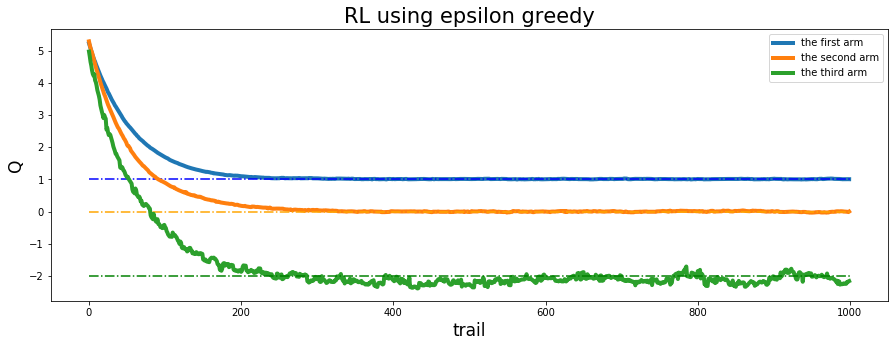

In [27]:
plt.figure(figsize=(15,5))
Qs_list = []
Qs = np.random.random(3)*10
Qs_list.append(Qs*1)
elpsilon = 0.5
action_n = [0,0,0]
for t in range(1,1000):
    arm = select_arm_e_greedy(Qs, epsilon)
    R = reward(arm)
    action_n[arm]=+1
    Qs[arm] = Qs[arm] + 1/action_n[arm]*(R-Qs[arm])
    Qs_list.append(Qs*1)
Qs_data = np.array(Qs_list*1)
ens = 150
for E in range(ens):
    Qs_list = []
    Qs = np.random.random(3)*10
    Qs_list.append(Qs*1)
    action_arm =[0,0,0]
    for t in range(1,1000):
        arm = select_arm_e_greedy(Qs, epsilon)
        R = reward(arm)
        action_n[arm]=+1
        Qs[arm] = Qs[arm] + 0.05/action_n[arm]*(R-Qs[arm])
        Qs_list.append(Qs*1)
    Qs_data += np.array(Qs_list*1)

plt.plot(Qs_data[:,0]/ens,label = 'the first arm',linewidth=4)
plt.plot([0,1000],[1,1],'-.',color='b')
plt.plot(Qs_data[:,1]/ens,label = 'the second arm',linewidth=4)
plt.plot([0,1000],[0,0],'-.',color='orange')
plt.plot(Qs_data[:,2]/ens,label = 'the third arm',linewidth=4)
plt.plot([0,1000],[-2,-2],'-.',color='green')
plt.title('RL using epsilon greedy',size=21)
plt.xlabel('trail',size=17)
plt.ylabel('Q',size=17)
plt.legend()

## Hooray!
the agents converged to the right numebrs (note that the converged value must be the mean of the distribution

### Train an agent using Softmax policy & decreasing temperature and plot the average reward against trials

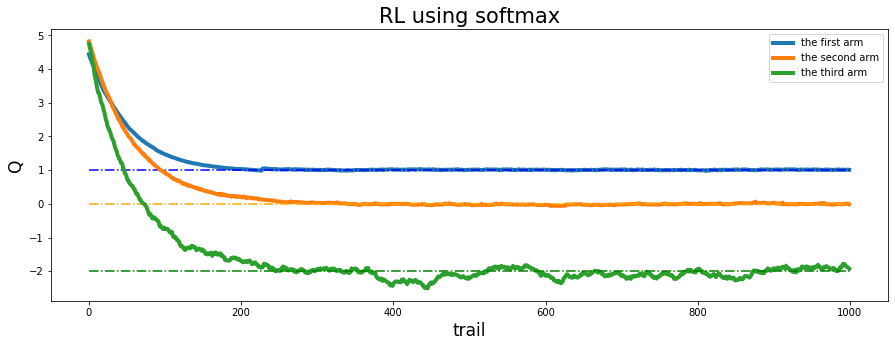

In [24]:
plt.figure(figsize=(15,5))
Qs_list = []
Qs = np.random.random(3)*10-5
Qs_list.append(Qs*1)
elpsilon = 0.5
action_n = [0,0,0]
for t in range(1,1000):
    arm = select_arm_softmax(Qs, epsilon)
    R = reward(arm)
    action_n[arm]=+1
    Qs[arm] = Qs[arm] + 1/action_n[arm]*(R-Qs[arm])
    Qs_list.append(Qs*1)
Qs_data = np.array(Qs_list*1)
ens = 100
for E in range(ens):
    Qs_list = []
    Qs = np.random.random(3)*10
    Qs_list.append(Qs*1)
    action_arm =[0,0,0]
    for t in range(1,1000):
        arm = select_arm_e_greedy(Qs, epsilon)
        R = reward(arm)
        action_n[arm]=+1
        Qs[arm] = Qs[arm] + 0.05/action_n[arm]*(R-Qs[arm])
        Qs_list.append(Qs*1)
    Qs_data += np.array(Qs_list*1)

plt.plot(Qs_data[:,0]/ens,label = 'the first arm',linewidth=4)
plt.plot([0,1000],[1,1],'-.',color='b')
plt.plot(Qs_data[:,1]/ens,label = 'the second arm',linewidth=4)
plt.plot([0,1000],[0,0],'-.',color='orange')
plt.plot(Qs_data[:,2]/ens,label = 'the third arm',linewidth=4)
plt.plot([0,1000],[-2,-2],'-.',color='green')
plt.title('RL using softmax',size=21)
plt.xlabel('trail',size=17)
plt.ylabel('Q',size=17)
plt.legend()

### Train agent to solve the problem using reinforcement comparison at home ;) 